In [332]:
import pandas as pd 
import matplotlib.pyplot as plt 

data_01 = pd.read_csv('../data/0.1_results_with_calculate_last.csv')
data_02 = pd.read_csv('../data/0.2_results_with_calculate_last.csv')
data_03 = pd.read_csv('../data/0.3_results_with_calculate_last.csv')
data_04 = pd.read_csv('../data/0.4_results_with_calculate_last.csv')
data_05 = pd.read_csv('../data/0.5_results_with_calculate_last.csv')
data_06 = pd.read_csv('../data/0.6_results_with_calculate_last.csv')
data_07 = pd.read_csv('../data/0.7_results_with_calculate_last.csv')
data_08 = pd.read_csv('../data/0.8_results_with_calculate_last.csv')
data_09 = pd.read_csv('../data/0.9_results_with_calculate_last.csv')

frames = [data_01, data_02, data_03, data_04, data_05, data_06, data_07, data_08, data_09]
data_with = pd.concat(frames)

data_01 = pd.read_csv('../data/0.1_results_without_calculate_last.csv')
data_02 = pd.read_csv('../data/0.2_results_without_calculate_last.csv')
data_03 = pd.read_csv('../data/0.3_results_without_calculate_last.csv')
data_04 = pd.read_csv('../data/0.4_results_without_calculate_last.csv')
data_05 = pd.read_csv('../data/0.5_results_without_calculate_last.csv')
data_06 = pd.read_csv('../data/0.6_results_without_calculate_last.csv')
data_07 = pd.read_csv('../data/0.7_results_without_calculate_last.csv')
data_08 = pd.read_csv('../data/0.8_results_without_calculate_last.csv')
data_09 = pd.read_csv('../data/0.9_results_without_calculate_last.csv')

frames = [data_01, data_02, data_03, data_04, data_05, data_06, data_07, data_08, data_09]
data_without = pd.concat(frames)

,nr,nazwa,pp,numberOfSeeds,seeds,totalNumberOfSeeds,numberOfNodes,steps,infectedTotal,infectedTotalPercentage,computionalTime,limitPercentage


In [175]:
# from datetime import timedelta

# x = timedelta(0, 6, 45204568)

# x.total_seconds()

# data_with[data_with['infectedTotalPercentage'] == ]

In [334]:


def changeToDate(x, mapa, unique):
    replaced = x.replace('(', '').replace('[', '').replace(' ', '').replace(')]', '')
    
    if(replaced not in unique):
        unique.append(replaced)

        splited = replaced.split(',')
#         print(splited, 'm', splited[0], 's', splited[1], 'msec', splited[2])

        mapa['m'] += int(splited[0])
        mapa['s'] += int(splited[1])
        mapa['msec'] += int(splited[2])
#         print(mapa)

def convert(x):
    temp = x.replace('datetime.timedelta', '').split('),')
#     print('nowy')
    mapa = {'m': 0, 's': 0, 'msec': 0}
    unique = []

    for tmp in temp:        
        changeToDate(tmp, mapa, unique)
        
#     print('koniec z czasem', timedelta(mapa['m'], mapa['s'], mapa['msec']).total_seconds())
    return timedelta(mapa['m'], mapa['s'], mapa['msec']).total_seconds()

#     print([tmp for tmp in temp])
#     print([tmp.apply(lambda x: x.replace('(', '')) for tmp in temp])


# data_with[71:72].apply(lambda x: convert(x['computionalTime']), axis=1)
# data_without[71:72].apply(lambda x: convert(x['computionalTime']), axis=1)

data_with['seconds'] = data_with.apply(lambda x: convert(x['computionalTime']), axis=1)
data_without['seconds'] = data_without.apply(lambda x: convert(x['computionalTime']), axis=1)

# data_with[np.isclose(data_with['infectedTotalPercentage'],95.525154, 0.0001)].apply(lambda x: convert(x['computionalTime']), axis=1)


In [311]:
data_with[44:46]

,nr,nazwa,pp,numberOfSeeds,seeds,totalNumberOfSeeds,numberOfNodes,steps,infectedTotal,infectedTotalPercentage,computionalTime,limitPercentage,seconds
44,4,8,0.1,2,2,502,12591,509,4599,36.52609,"[datetime.timedelta(0, 5, 592542), datetime.ti...",2,79.78351
45,4,8,0.1,4,4,1004,12591,490,5228,41.52172,"[datetime.timedelta(0, 6, 180287), datetime.ti...",2,55.90376


In [3]:
# import matplotlib.pyplot as plt 


# plt.figure();

# fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,20))

# net = 

# for nr in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
#     for numberOfSeeds in [2, 4, 8, 16]:
#         for limitPercentage in [2, 3, 4, 5]:
#             for pp in [0.1, 0.2, 0.3]:
#                 subdata_with = data_with[(data_with['nazwa'] == net) & (data_with['nr'] == nr) & (data_with['numberOfSeeds'] == numberOfSeeds) & (data_with['limitPercentage'] == limitPercentage)]
#                 subdata_without = data_without[(data_with['nazwa'] == net) & (data_without['nr'] == nr) & (data_without['numberOfSeeds'] == numberOfSeeds) & (data_without['limitPercentage'] == limitPercentage)]

#     #             subdata_without = data_without[(data_without['nr'] == nr) & (data_without['numberOfSeeds'] == numberOfSeeds) & (data_without['limitPercentage'] == limitPercentage)]
#     #             subdata_with = data_with[(data_with['nr'] == nr) & (data_with['numberOfSeeds'] == numberOfSeeds) & (data_with['limitPercentage'] == limitPercentage)]

#                 ax.scatter(list(range(len(subdata_with.index))), subdata_with['infectedTotalPercentage'], s=1, color='red')
#                 ax.scatter(list(range(len(subdata_without.index))), subdata_without['infectedTotalPercentage'], s=1, color='blue')



In [337]:
import matplotlib.pyplot as plt 


plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,20))

lastRows_with = pd.DataFrame()
lastRows_without = pd.DataFrame()

for net in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    for pp in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
        for numberOfSeeds in [2, 4, 8, 16]:
            for limitPercentage in [1, 2, 3, 4, 5]:
                subdata_with = data_with[(data_with['nazwa'] == net) & (data_with['pp'] == pp) & (data_with['numberOfSeeds'] == numberOfSeeds) & (data_with['limitPercentage'] == limitPercentage)]
                subdata_without = data_without[(data_without['nazwa'] == net) & (data_without['pp'] == pp) & (data_without['numberOfSeeds'] == numberOfSeeds) & (data_without['limitPercentage'] == limitPercentage)]
                
#                 subdata_without = subdata_without.mean()
#                 subdata_with = subdata_with.mean()

                subdata_without = subdata_without.mean()
                subdata_with = subdata_with.mean()

#                 print(subdata_without['infectedTotal'])
#                 print(subdata_with['infectedTotal'])

                temp_without = pd.DataFrame(subdata_without)
                temp_with = pd.DataFrame(subdata_with)
                
                temp = pd.DataFrame({'without': [subdata_without['infectedTotalPercentage']], 'with': [subdata_with['infectedTotalPercentage']], 
                                     'increase': [subdata_with['infectedTotalPercentage'] / subdata_without['infectedTotalPercentage']],'secondsWithout': subdata_without['seconds'], 'secondsWith': subdata_with['seconds']})
                
                lastRows_with = lastRows_with.append(temp)

                                    
#                 lastRows_with = lastRows_with.append(temp_with.mean(), ignore_index=True)
#                 lastRows_without = lastRows_without.append(temp_without.mean(), ignore_index=True)

#                 lastRows_with = lastRows_with.append(temp_with)
#                 lastRows_without = lastRows_without.append(temp_without)


In [338]:
lastRows_with = lastRows_with.sort_values('increase')
lastRows_with = lastRows_with.dropna()
lastRows_with

,increase,secondsWith,secondsWithout,with,without
0,0.99946,0.32936,0.43349,98.42895,98.48191
0,0.99993,1.06196,1.69430,95.29860,95.30496
0,1.00000,19.79269,227.61764,100.00000,100.00000
0,1.00000,3.92716,9.37772,100.00000,100.00000
0,1.00000,3.91744,7.48728,100.00000,100.00000
0,1.00000,5.30588,13.15458,100.00000,100.00000
0,1.00000,5.30531,17.17547,100.00000,100.00000
0,1.00000,5.29961,21.31859,100.00000,100.00000
0,1.00000,3.88745,21.49554,100.00000,100.00000
0,1.00000,4.22135,8.99158,100.00000,100.00000


<Figure size 432x288 with 0 Axes>

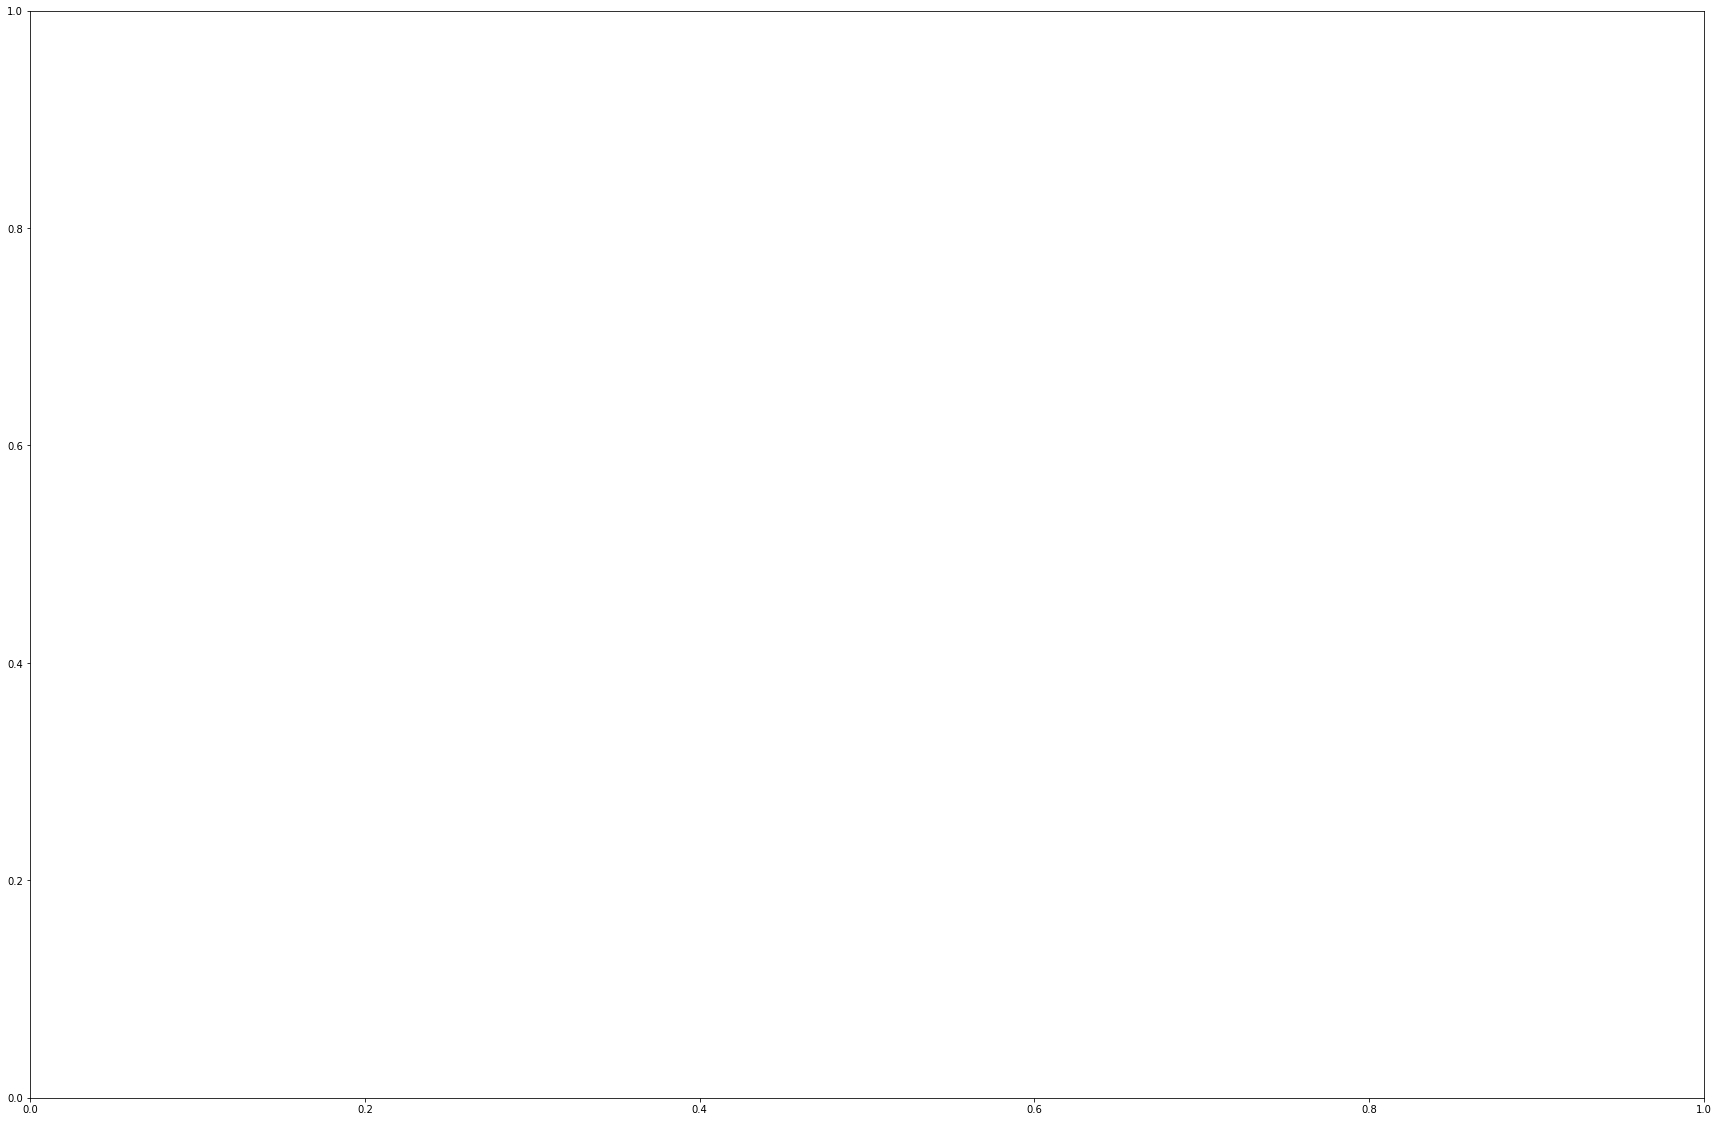

<Figure size 432x288 with 0 Axes>

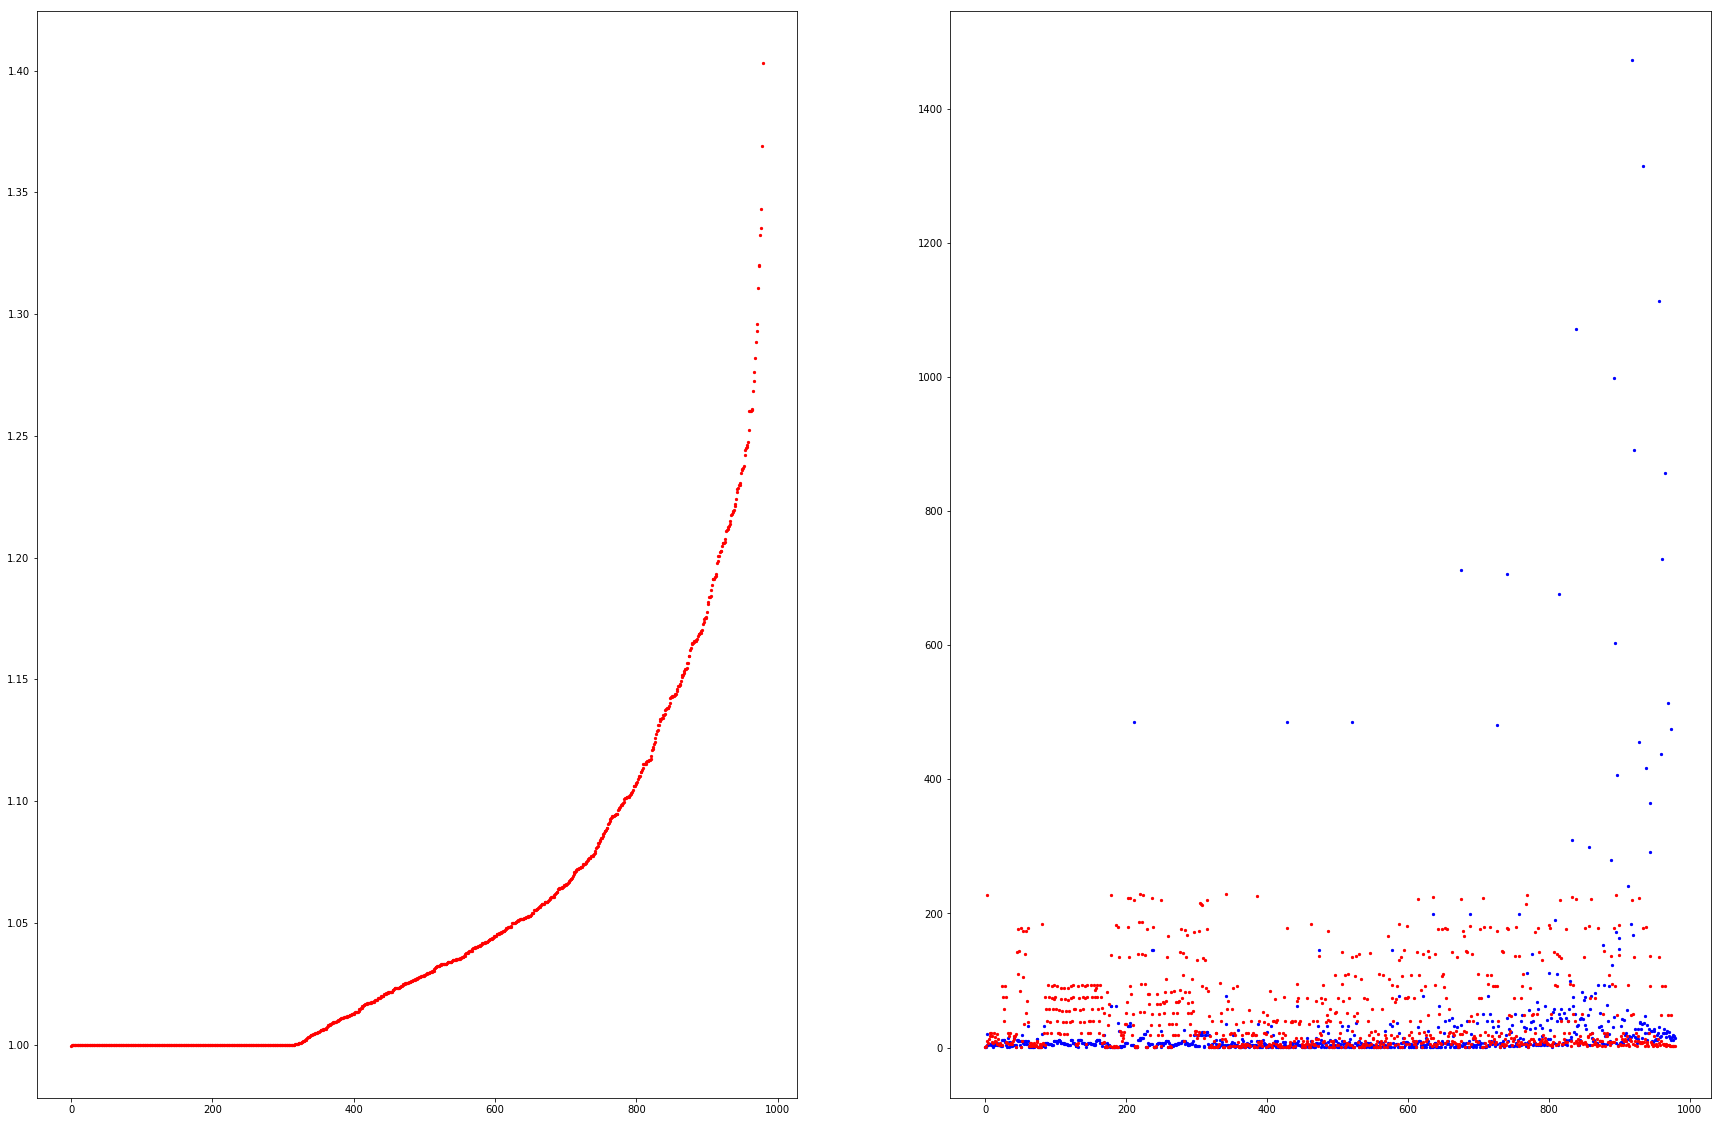

In [339]:
plt.figure();

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30,20))


# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['infectedTotalPercentage'], s=10, color='red')
# ax.scatter(list(range(len(lastRows_without.index))), lastRows_without['infectedTotalPercentage'], s=5, color='blue')

# ax[0].scatter(list(range(len(lastRows_with.index))), lastRows_with['with'], s=5, color='blue')
# ax[0].scatter(list(range(len(lastRows_with.index))), lastRows_with['without'], s=5, color='red')

ax[1].scatter(list(range(len(lastRows_with.index))), lastRows_with['secondsWith'], s=5, color='blue')
ax[1].scatter(list(range(len(lastRows_with.index))), lastRows_with['secondsWithout'], s=5, color='red')

# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['with'], s=5, color='blue')
ax[0].scatter(list(range(len(lastRows_with.index))), lastRows_with['increase'], s=5, color='red')


plt.show()


In [9]:
lastRows_without

,infectedTotal,infectedTotalPercentage,limitPercentage,nazwa,nr,numberOfNodes,numberOfSeeds,pp,seeds,steps,totalNumberOfSeeds
0,783.4,64.003268,1.0,3.0,4.6,1224.0,2.0,0.1,2.0,19.3,24.0
1,796.3,65.057190,2.0,3.0,4.6,1224.0,2.0,0.1,2.0,32.2,47.9
2,808.7,66.070261,3.0,3.0,4.6,1224.0,2.0,0.1,2.0,44.5,72.0
3,821.4,67.107843,4.0,3.0,4.6,1224.0,2.0,0.1,2.0,57.3,95.8
4,835.6,68.267974,5.0,3.0,4.6,1224.0,2.0,0.1,2.0,70.4,122.0
5,807.4,65.964052,1.0,3.0,4.6,1224.0,4.0,0.1,4.0,19.3,47.7
6,845.9,69.109477,2.0,3.0,4.6,1224.0,4.0,0.1,4.0,33.5,95.9
7,882.6,72.107843,3.0,3.0,4.6,1224.0,4.0,0.1,4.0,46.1,143.8
8,920.7,75.220588,4.0,3.0,4.6,1224.0,4.0,0.1,4.0,60.1,191.5
9,962.2,78.611111,5.0,3.0,4.6,1224.0,4.0,0.1,4.0,74.5,243.4
